# Data Exploration

This notebook helps in the analysis of the available dataset. Results from this analysis can be used for preprocessing the data, which would aid in obtaining better and more generalized models.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from matplotlib import style
from cStringIO import StringIO
import PIL.Image
import IPython.display
import shutil
import math
from skimage import io,color, exposure, transform


#### Data Loading

In [24]:
X_train = np.load('storage/data_file.npy')
y_train = np.load('storage/labels_file.npy')
X_test = np.load('storage/test_data_file.npy')
print 'Loading Successful'

Loading Successful


## Analysis of the Datasets

In [25]:
n_train = X_train.shape[0]

n_test = X_test.shape[0]

image_shape = (X_train.shape[1],X_train.shape[2])

classes = list(set(y_train))

n_classes = len(classes)

print "Number of training samples: "+str(n_train)
print "Number of testing samples: "+str(n_test)
print "Dimensions of each image: "+str(image_shape)
print "Number of classes: "+str(n_classes)

Number of training samples: 39209
Number of testing samples: 12630
Dimensions of each image: (32, 32)
Number of classes: 43


Number of samples on first 15 classes: 23040
Number of samples on last 15 classes: 8399


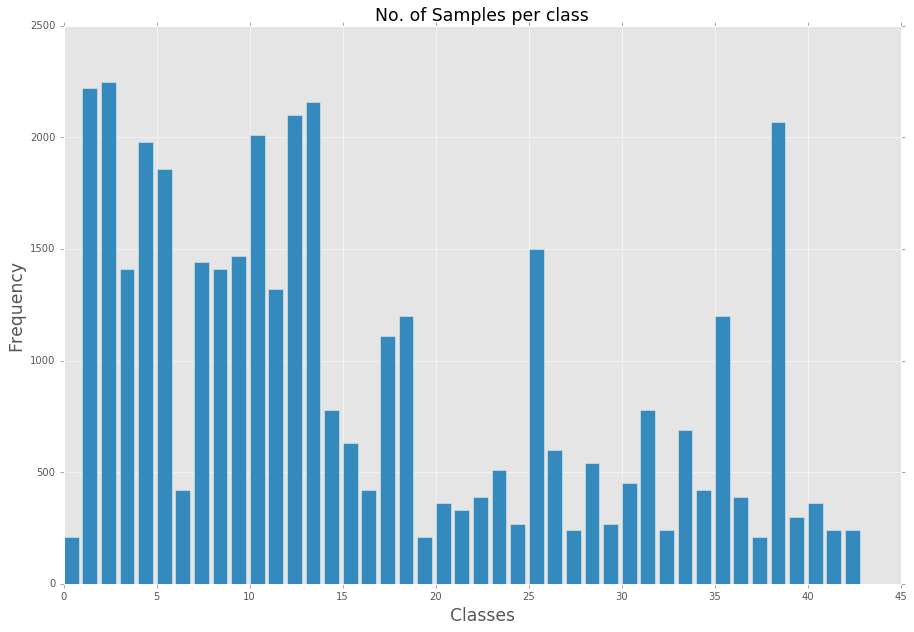

In [26]:
frequency = [len(list(group)) for key, group in groupby(y_train)]

style.use('ggplot')

count=0
sum1=0
sum2=0
for i in frequency:
    if count<15:
        sum1=sum1+i
    elif count>27:
        sum2+=i
    count+=1
        
print "Number of samples on first 15 classes: "+str(sum1)
print "Number of samples on last 15 classes: "+str(sum2)

x = classes
y = frequency
width = 15
height = 10
plt.figure(1,figsize=(width, height))

plt.bar(x,y)
plt.title('No. of Samples per class',fontsize='xx-large')
plt.ylabel('Frequency',fontsize='xx-large')
plt.xlabel('Classes',fontsize='xx-large')
plt.show()


In [27]:

def find_rectangle(n, max_ratio=2):
    sides = []
    square = int(math.sqrt(n))
    for w in range(square, max_ratio * square):
        h = n / w
        used = w * h
        leftover = n - used
        sides.append((leftover, (w, h)))
    return sorted(sides)[0][1]

def make_mosaic(images, n=None, nx=None, ny=None, w=None, h=None):
    if n is None and nx is None and ny is None:
        nx, ny = find_rectangle(len(images))
    else:
        nx = n if nx is None else nx
        ny = n if ny is None else ny
    images = np.array(images)
    if images.ndim == 2:
        side = int(np.sqrt(len(images[0])))
        h = side if h is None else h
        w = side if w is None else w
        images = images.reshape(-1, h, w)
    else:
        h = images.shape[1]
        w = images.shape[2]
    mosaic = np.zeros((h*ny, w*nx,3))
    image_gen = iter(images)
    for i in range(ny):
        ia = (i)*h
        ib = (i+1)*h
        for j in range(nx):
            ja = j*w
            jb = (j+1)*w
            img = next(image_gen)
            mosaic[ia:ib, ja:jb,0] = img[:h,:w,0]
            mosaic[ia:ib, ja:jb,1] = img[:h,:w,1]
            mosaic[ia:ib, ja:jb,2] = img[:h,:w,2]

    return mosaic

def show_array(a,width,height, fmt='png', filename=None):
    a = np.uint8(np.clip(a, 0, 255))
    image_data = StringIO()
    PIL.Image.fromarray(a).save(image_data, fmt)
    if filename is None:
        IPython.display.display(IPython.display.Image(data=image_data.getvalue(),width=width,height=height))
    else:
        with open(filename, 'w') as f:
            image_data.seek(0)
            shutil.copyfileobj(image_data, f)

    

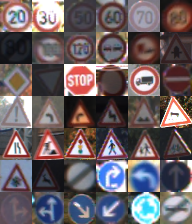

In [28]:
mosaic_array = []
counter = 39
width = 500
height = 500
for i in frequency:
    mosaic_array.append(X_train[counter])
    counter+=i
mosaic_array = np.array(mosaic_array)
show_array(make_mosaic(mosaic_array),width,height)

In [29]:
classes = np.load('storage/classes_file.npy')
def find_types(classes):
    count = [0,0,0,0]
    for c in classes:
        if 'prohibitory' in c:
            count[0]=count[0]+1
        elif 'danger' in  c:
            count[1]=count[1]+1
        elif 'mandatory' in c:
            count[2]=count[2]+1
        else:
            count[3]=count[3]+1
    return count

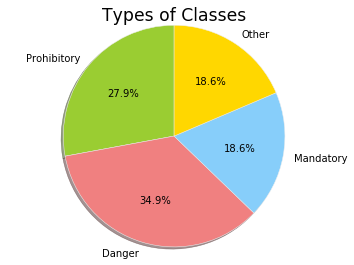

In [35]:
count = find_types(classes)
labels = 'Prohibitory','Danger','Mandatory','Other'
sizes = count
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Types of Classes',fontsize='xx-large')
plt.show()

In [31]:
classes = np.load('storage/classes_file.npy')
print 'Legend for class values and names'
print ''
for i in xrange(len(classes)):
    print '%d = '%i+classes[i]

Legend for class values and names

0 = speed limit 20 (prohibitory)
1 = speed limit 30 (prohibitory)
2 = speed limit 50 (prohibitory)
3 = speed limit 60 (prohibitory)
4 = speed limit 70 (prohibitory)
5 = speed limit 80 (prohibitory)
6 = restriction ends 80 (other)
7 = speed limit 100 (prohibitory)
8 = speed limit 120 (prohibitory)
9 = no overtaking (prohibitory)
10 = no overtaking (trucks) (prohibitory)
11 = priority at next intersection (danger)
12 = priority road (other)
13 = give way (other)
14 = stop (other)
15 = no traffic both ways (prohibitory)
16 = no trucks (prohibitory)
17 = no entry (other)
18 = danger (danger)
19 = bend left (danger)
20 = bend right (danger)
21 = bend (danger)
22 = uneven road (danger)
23 = slippery road (danger)
24 = road narrows (danger)
25 = construction (danger)
26 = traffic signal (danger)
27 = pedestrian crossing (danger)
28 = school crossing (danger)
29 = cycles crossing (danger)
30 = snow (danger)
31 = animals (danger)
32 = restriction ends (other)


Number of samples in 'prohibitory' category : 17310
Number of samples in 'danger' category : 8970
Number of samples in 'mandatory' category : 5639
Number of samples in 'other' category : 7290


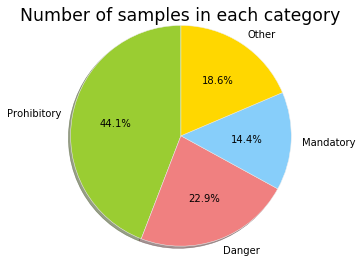

In [32]:
count_samples_per_category=[0,0,0,0]
for i in y_train:
    label = classes[i]
    if 'prohibitory' in label:
        count_samples_per_category[0]+=1
    elif 'danger' in label:
        count_samples_per_category[1]+=1
    elif 'mandatory' in label:
        count_samples_per_category[2]+=1
    else:
        count_samples_per_category[3]+=1

print 'Number of samples in \'prohibitory\' category : ' + str(count_samples_per_category[0])
print 'Number of samples in \'danger\' category : ' + str(count_samples_per_category[1])
print 'Number of samples in \'mandatory\' category : ' + str(count_samples_per_category[2])
print 'Number of samples in \'other\' category : ' + str(count_samples_per_category[3])

labels = 'Prohibitory','Danger','Mandatory','Other'
sizes = count_samples_per_category
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'gold']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Number of samples in each category',fontsize='xx-large')

plt.show()

In [33]:
detection_data = np.load('storage/detect_data_file.npy')
detection_labels = np.load('storage/detect_labels_file.npy')
print 'Detection Data Loading Successful'

Detection Data Loading Successful


In [34]:
p_count = 0
for label in detection_labels:
    if label == 1:
        p_count=p_count+1
n_count = len(detection_labels) - p_count

print 'Total number of samples in the detection dataset: %d'%len(detection_labels)
print 'Number of positive samples: %d'%p_count
print 'Number of negative samples: %d'%n_count

Total number of samples in the detection dataset: 8484
Number of positive samples: 1212
Number of negative samples: 7272
